### Временные ряды
Научимся загружать и строить графики временных рядов.
Временные ряды (англ. time series) — это последовательности чисел на оси времени. Например:
- цена акций компании в начале торгов;
- объём продаж интернет-магазина по дням;
- количество игроков в онлайне по часам.

Интервал между значениями ряда постоянный: скажем, день, час или 10 минут.
Повторим, как работать с датами и временем в Pandas. Перед вами данные американской энергетической компании PJM East. В файле energy_consumption.csv указано, сколько электроэнергии потребляют её клиенты.

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/trisha00001/file/main/energy_consumption.csv')
print(data.head())

              Datetime  PJME_MW
0  2002-12-31 01:00:00  26498.0
1  2002-12-31 02:00:00  25147.0
2  2002-12-31 03:00:00  24574.0
3  2002-12-31 04:00:00  24393.0
4  2002-12-31 05:00:00  24860.0


Рассмотрим столбцы таблицы:
- Datetime (англ. «дата-время») — значение даты и времени на временной оси. Переменная называется так же, как и тип данных datetime. В этой таблице интервал равен одному часу.
- PJME_MW (название компании и MW; англ. megawatt, «мегаватт») — расход электроэнергии за час.

Нужно привести данные к удобному формату, для их анализа выделить временной промежуток, а затем построить график временного ряда. В этом поможет документация Pandas.

## Задание

1. Измените тип данных Datetime с object на datetime64. Но прежде запустите код и просмотрите общую информацию о данных.

В документации Pandas выберите любой способ преобразования данных. Формат вывода даты указывать не нужно: библиотека определит его самостоятельно.
Напечатайте на экране информацию о таблице (уже в прекоде).

In [ ]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/trisha00001/file/main/energy_consumption.csv')
data['Datetime'] = pd.to_datetime(data['Datetime'])

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Datetime  145366 non-null  datetime64[ns]
 1   PJME_MW   145366 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.2 MB
None


2. Установите индекс таблицы равным столбцу Datetime. В документации
Pandas выберите любой способ установки индекса.

Напечатайте на экране информацию о таблице (уже в прекоде).

In [ ]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/trisha00001/file/main/energy_consumption.csv', parse_dates=[0],index_col = 'Datetime')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJME_MW  145366 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB
None


3. Чтобы проверить, в хронологическом ли порядке расположены даты и время, посмотрите атрибут индекса таблицы is_monotonic (англ. «монотонный»). Если порядок соблюдён, атрибут вернёт True, если нет — False.

Отсортируйте индекс таблицы. Метод найдите в документации.

Напечатайте на экране значение атрибута is_monotonic (уже в прекоде). Затем вызовом функции info() выведите на экран общую информацию о таблице.

In [ ]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/trisha00001/file/main/energy_consumption.csv', index_col=[0], parse_dates=[0])
data = data.sort_index()
print(data.index.is_monotonic)
print(data.info())

True
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-01-01 01:00:00 to 2018-08-03 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJME_MW  145366 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB
None


<ipython-input-3-9e9b2fd26f20>:4: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  print(data.index.is_monotonic)


4. Из временного ряда выделите данные с января по июнь 2018 года.  

Даты во временных рядах можно указывать в срезах. В прекоде выбраны значения с 2016 по 2017 год включительно.

Напечатайте на экране информацию о таблице (уже в прекоде).

In [ ]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/trisha00001/file/main/energy_consumption.csv', index_col=[0], parse_dates=[0])
data.sort_index(inplace=True)
#data = data['2016':'2017']
data = data['2018-01': '2018-06' ]
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4343 entries, 2018-01-01 00:00:00 to 2018-06-30 23:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PJME_MW  4343 non-null   float64
dtypes: float64(1)
memory usage: 67.9 KB
None


5. Постройте график временного ряда.

<Axes: xlabel='Datetime'>

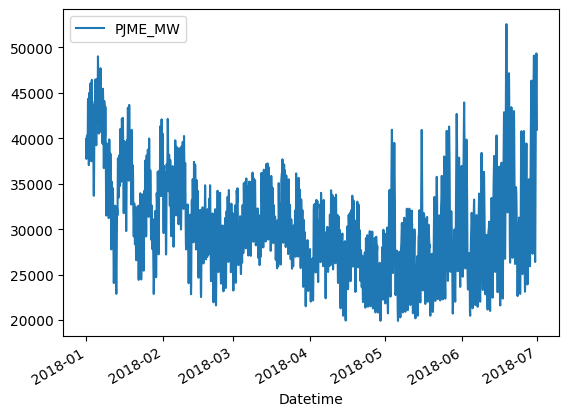

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/trisha00001/file/main/energy_consumption.csv', index_col=[0], parse_dates=[0])
data.sort_index(inplace=True)
data = data['2018-01':'2018-06']
data.plot()

### Ресемплирование
Как поменять интервал временного ряда? Выполним его ресемплирование.
Ресемплирование, или ресемплинг (англ. resample, «повторная выборка»), — это изменение интервала со значениями ряда. Его выполняют в два этапа:
1. Выбирают новую длину интервала. Причём значения из текущего интервала группируются. Допустим, интервал равен 10 минутам. Возьмём новый интервал — 30 минут. В него попадут значения из трёх 10-минутных интервалов.
2. В каждой группе вычисляется агрегированное значение ряда. Это может быть медиана, среднее, максимум или минимум.

<img src ='https://github.com/trisha00001/file/blob/main/resample_1581659654.jpg?raw=true'>

Чтобы поменять интервал и сгруппировать значения, вызовем функцию resample(). В аргументе укажем новый интервал. Например:

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/trisha00001/file/main/energy_consumption.csv', index_col=[0], parse_dates=[0])
# 1H англ. hour, 1 час
data.resample('1H')

# 2W англ. week, 2 недели
data.resample('2W')

Функция resample() похожа на groupby(). После группировки вызовем функции mean() и max() для агрегации значений:

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/trisha00001/file/main/energy_consumption.csv', index_col=[0], parse_dates=[0])
# среднее по каждому часу
data.resample('1H').mean()

# максимум по каждым двум неделям
data.resample('2W').max()

,PJME_MW
Datetime,
2002-01-06,40002.0
2002-01-20,39581.0
2002-02-03,37167.0
2002-02-17,39201.0
2002-03-03,37820.0
...,...
2018-06-17,42875.0
2018-07-01,52558.0
2018-07-15,56609.0


Задача 1. Постройте график среднего потребления электроэнергии по годам.

<Axes: xlabel='Datetime'>

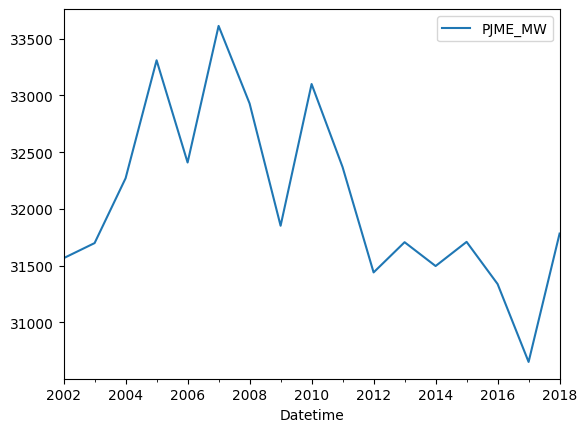

In [ ]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/trisha00001/file/main/energy_consumption.csv', index_col=[0], parse_dates=[0])
data.sort_index(inplace=True)
data = data.resample('1Y').mean()
data.plot()

2. Постройте график энергопотребления с января по июнь 2018 года. Выберите интервал в один день, по каждому — вычислите суммарное энергопотребление.

<Axes: xlabel='Datetime'>

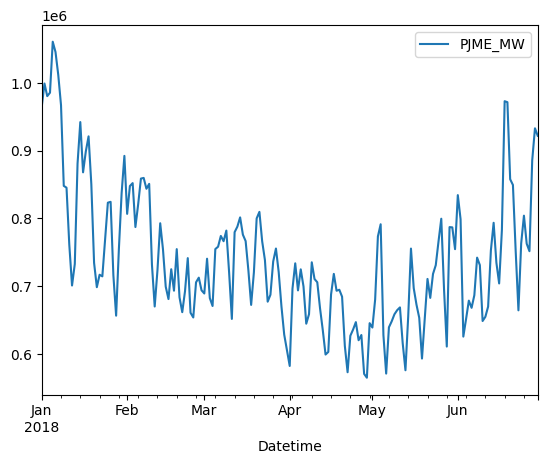

In [ ]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/trisha00001/file/main/energy_consumption.csv', index_col=[0], parse_dates=[0])
data.sort_index(inplace=True)
data = data['2018-01':'2018-06']
data = data.resample('1D').sum()
data.plot()

### Скользящее среднее
Чтобы во временном ряду снизить колебания, применим скользящее среднее.
Скользящее среднее (англ. rolling mean), или движущееся среднее (англ. moving average), — метод сглаживания временных рядов. Его суть заключается в поиске значений, которые меньше всего подвержены колебаниям, то есть средних арифметических.

Метод работает так: экспериментально подбирается размер окна (англ. window size) — интервал, в котором выполняют усреднение. Чем интервал больше, тем сильнее сглаживание. Затем окно начинает «скользить» почти от начала ряда к его концу, в каждой точке вычисляя среднее значение ряда и тем самым сглаживая его.

В скользящем среднем окна «наслаиваются» друг на друга и не могут выходить за пределы ряда. Поэтому средних будет чуть меньше, чем исходных значений ряда.

В Pandas скользящее среднее вычисляют в два этапа:
<img src = 'https://github.com/trisha00001/file/blob/main/ezgif.com-video-to-gif_1581660134.gif?raw=true'>
1. Вызовом функции rolling() создают скользящее окно. В аргументе указывают его размер:


In [ ]:
# размер окна 7
data.rolling(7)

Rolling [window=7,center=False,axis=0,method=single]

2. Для агрегации значений вызывают функцию mean():


In [ ]:
# скользящее среднее с окном размером 7
data.rolling(7).mean()

,PJME_MW
Datetime,
2018-01-01,NaN
2018-01-02,NaN
2018-01-03,NaN
2018-01-04,NaN
2018-01-05,NaN
...,...
2018-06-26,779123.000000
2018-06-27,763952.142857
2018-06-28,769126.428571


### Задание

Добавьте в столбец 'rolling_mean' скользящее среднее с размером окна, равным 10. Выведите на экран графики энергопотребления с января по июнь 2018 года и скользящего среднего (уже в прекоде).

<Axes: xlabel='Datetime'>

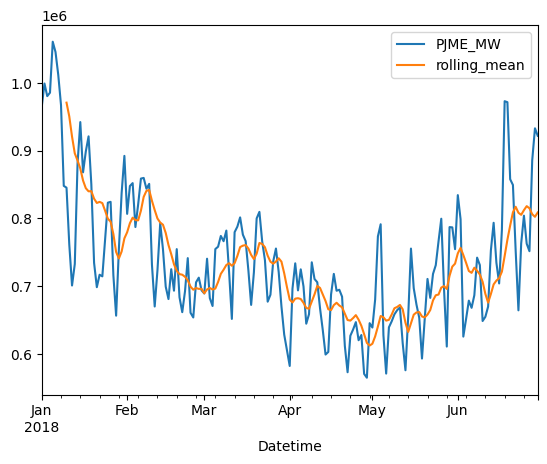

In [ ]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/trisha00001/file/main/energy_consumption.csv', index_col=[0], parse_dates=[0])
data.sort_index(inplace=True)
data = data['2018-01':'2018-06'].resample('1D').sum()
data['rolling_mean'] = data.rolling(10).mean()
data.plot()

### Тренды и сезонность

Чтобы лучше понимать временной ряд, разберём тренды и сезонность.
Тренд (англ. trend) — плавное изменение среднего значения ряда без повторяющихся закономерностей. Например, ежегодное увеличение объёма продаж авиабилетов.

Сезонность (англ. seasonality) — циклично повторяющиеся закономерности во временном ряду. Допустим, рост продаж авиабилетов летом.

Тренды и сезонность зависят от масштаба данных. Нельзя увидеть закономерности, повторяющиеся каждое лето, если есть данные только за год.
Посмотрим на график rolling_mean. Увеличение энергопотребления зимой и летом — это тренд.


Если эти данные анализировать в масштабе нескольких лет, рост энергопотребления зимой и летом — это уже сезонные изменения.

В модуле tsa.seasonal (от англ. time series analysis, «анализ временных рядов») библиотеки statsmodels (англ. «статистические модели») есть функция seasonal_decompose() (англ. «разбить на части»). Она раскладывает временной ряд на три составляющие: тренд, сезонность и остаток (англ. residuals). Это компонента, которая не объясняется трендом и сезонностью, это шум.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(data)

Функция seasonal_decompose() принимает временной ряд, а возвращает объект структуры DecomposeResult (англ. «результат разделения»). В нём есть нужные атрибуты:
- decomposed.trend — тренд;
- decomposed.seasonal — сезонная составляющая;
- decomposed.resid — остаток декомпозиции.

### Задача
1. Разложите временной ряд на тренд и сезонную компоненту. Допишите код вывода графиков этих составляющих ряда

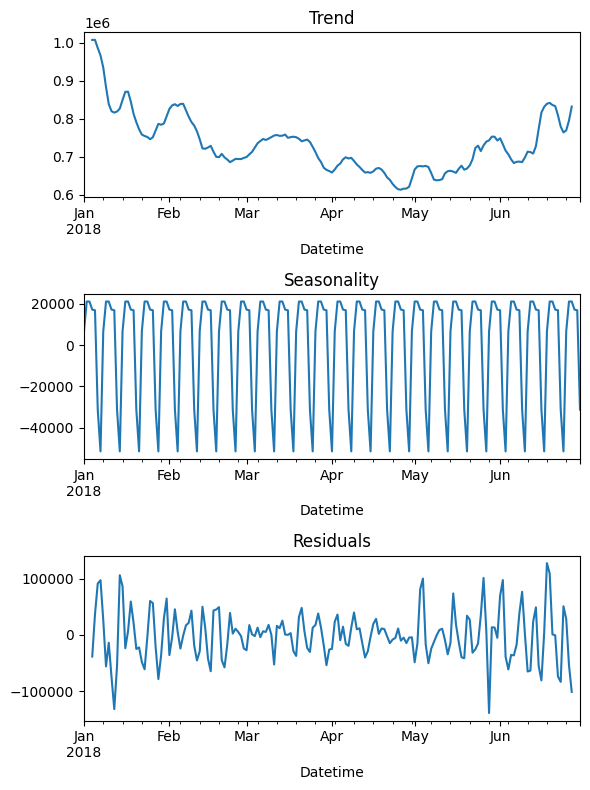

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/trisha00001/file/main/energy_consumption.csv', index_col=[0], parse_dates=[0])
data.sort_index(inplace=True)
data = data['2018-01':'2018-06'].resample('1D').sum()

decomposed = seasonal_decompose(data)

plt.figure(figsize=(6, 8))
plt.subplot(311)
# Чтобы график корректно отобразился, указываем его
# оси ax, равными plt.gca() (англ. get current axis,
# получить текущие оси)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

Задача 2. Постройте график сезонной составляющей за первые 15 дней января 2018 года.

<Axes: title={'center': 'Seasonality'}, xlabel='Datetime'>

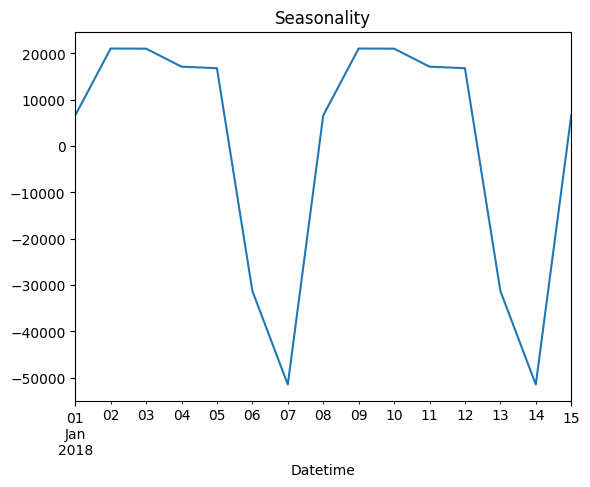

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/trisha00001/file/main/energy_consumption.csv', index_col=[0], parse_dates=[0])
data.sort_index(inplace=True)
data = data['2018-01':'2018-06'].resample('1D').sum()
decomposed = seasonal_decompose(data)
plt.title('Seasonality')
decomposed.seasonal['2018-01-01':'2018-01-15'].plot(ax=plt.gca())

### Стационарные ряды
Прогнозировать данные помогают стационарные ряды. Разберёмся, что это такое.

В задаче потребления электроэнергии найдём скользящее стандартное отклонение (англ. rolling standard deviation, rolling std) — стандартное отклонение по скользящему окну:

<Axes: xlabel='Datetime'>

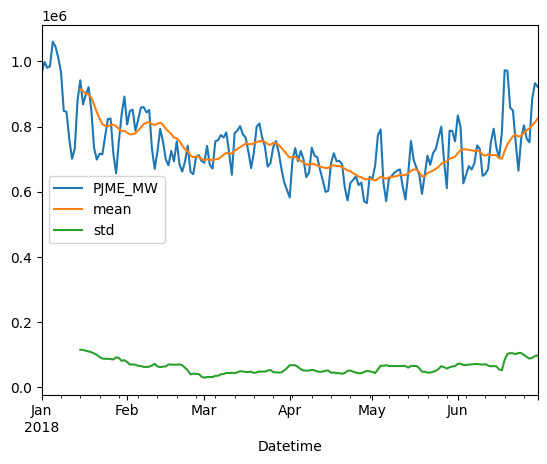

In [ ]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/trisha00001/file/main/energy_consumption.csv', index_col=[0], parse_dates=[0])
data.sort_index(inplace=True)
data = data['2018-01':'2018-06'].resample('1D').sum()
data['mean'] = data['PJME_MW'].rolling(15).mean()
data['std'] = data['PJME_MW'].rolling(15).std()
data.plot()

В статистике временной ряд описывается стохастическим процессом (англ. stochastic process). Это случайная величина, у которой со временем меняется её распределение. У этой величины есть среднее и дисперсия, которые тоже меняются.

Стохастический процесс стационарный (англ. stationary stochastic process), если его распределение со временем не меняется. Например, к такому процессу относятся периодические колебания значений.

<img src ='https://github.com/trisha00001/file/blob/main/stationary_stochastic_process_1581660680.jpg?raw=true'>

Если распределение меняется, то процесс называется нестационарным (англ. nonstationary stochastic process).

Узнать распределение временного ряда нельзя. Поэтому стационарные временные ряды (англ. stationary time series) — это ряды, у которых среднее и стандартное отклонение не меняются. Когда среднее и стандартное отклонение первого ряда меняется медленнее второго, то первый ряд «более стационарный», чем второй.

Нестационарные ряды (англ. nonstationary time series) прогнозировать сложнее: их свойства меняются слишком быстро.

### Разности временного ряда

Чтобы ряд сделать стационарным, найдём разности его значений.
Разности временного ряда (англ. time series difference) — это набор разностей между соседними элементами временного ряда, т. е. из каждого значения вычитается предыдущее.

Для поиска разностей временного ряда применяется метод shift() (англ. «сдвиг»). Все значения он сдвигает вдоль временной оси на один шаг вперёд:

In [ ]:
data = pd.Series([0.5, 0.7, 2.4, 3.2])
print(data)
print(data.shift())


0    0.5
1    0.7
2    2.4
3    3.2
dtype: float64
0    NaN
1    0.5
2    0.7
3    2.4
dtype: float64


Последнее значение ряда пропадает: его сдвигать некуда. На месте нулевого — NaN, потому что для него значения нет. Добавим аргумент, чтобы заполнить недостающие значения:

In [ ]:
import pandas as pd

data = pd.Series([0.5, 0.7, 2.4, 3.2])
print(data)
# англ. заполнить значением
print(data.shift(fill_value=0))

0    0.5
1    0.7
2    2.4
3    3.2
dtype: float64
0    0.0
1    0.5
2    0.7
3    2.4
dtype: float64


Разности временного ряда более стационарны, чем сам ряд. Например, нелинейный тренд преобразуется в линейный:
<img src ='https://github.com/trisha00001/file/blob/main/Untitled_1581661411.png?raw=true'>